In [1]:
"""
1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term methods) of a woman based 
   on her demographic and socio-economic characteristics.

5. Number of Instances: 1473

6. Number of Attributes: 10 (including the class attribute)

7. Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term

8. Missing Attribute Values: None
"""

'\n1. Первое задание\n\nПростая задача бинарной классификации с преобразованием признаков\n\nДАТАСЕТ:\nhttps://archive.ics.uci.edu/ml/datasets/Adult\n\nAge – возраст, количественный признак\nWorkclass – тип работодателя, количественный признак\nfnlwgt – итоговый вес обьекта, количественный признак\nEducation – уровень образования, качественный признак\nEducation_Num – количество лет обучения, количественный признак\nMartial_Status – семейное положение, категориальный признак\nOccupation – профессия, категориальный признак\nRelationship – тип семейных отношений, категориальный признак\nRace – раса, категориальный признак\nSex – пол, качественный признак\nCapital_Gain – прирост капитала, количественный признак\nCapital_Loss – потери капитала, количественный признак\nHours_per_week – количество часов работы в неделю, количественный признак\nCountry – страна, категориальный признак\n\nЦелевая переменная: Target – уровень заработка, категориальный (бинарный) признак\n\nadult_data - обучающа

In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
figsize(12, 8)
import pandas as pd
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
elif sys.version_info.major == 3:
    from urllib.request import urlopen
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report





Populating the interactive namespace from numpy and matplotlib


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"

names = ['wife_age', 'wife_edu', 'husb_edu', 'children_num', 'wife_religion', 'wife_is_working', 'husb_occupation', 
         'living_index', 'media_exposure', 'method']
df = pd.read_csv(url, names=names)

In [5]:
df.head()

,wife_age,wife_edu,husb_edu,children_num,wife_religion,wife_is_working,husb_occupation,living_index,media_exposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [6]:
df.method.value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [9]:
df.children_num.value_counts()

2     276
1     276
3     259
4     197
5     135
0      97
6      92
7      49
8      47
9      16
11     11
10     11
12      4
13      2
16      1
Name: children_num, dtype: int64

In [18]:
len(df)

1473

In [19]:
df[df['method'] == 1]['children_num'].value_counts()

1     143
2     114
0      95
3      70
4      57
5      44
6      35
8      29
7      18
10      9
11      6
9       5
12      4
Name: children_num, dtype: int64

In [20]:
df[df['method'] == 2]['children_num'].value_counts()

3     70
4     62
2     56
1     46
5     36
6     27
7     19
8      9
9      3
11     2
10     2
13     1
Name: children_num, dtype: int64

In [21]:
df[df['method'] == 3]['children_num'].value_counts()

3     119
2     106
1      87
4      78
5      55
6      30
7      12
8       9
9       8
11      3
0       2
16      1
13      1
Name: children_num, dtype: int64

In [22]:
df[df['children_num'] == 0]['method'].value_counts()

1    95
3     2
Name: method, dtype: int64

In [31]:
df[df['children_num'] == 1]['method'].value_counts()

1    143
3     87
2     46
Name: method, dtype: int64

In [33]:
df.pivot_table(index=['children_num'], aggfunc='mean')

,husb_edu,husb_occupation,living_index,media_exposure,method,wife_age,wife_edu,wife_is_working,wife_religion
children_num,,,,,,,,,
0,3.474227,2.278351,2.989691,0.041237,1.041237,27.546392,2.907216,0.546392,0.845361
1,3.518116,2.184783,3.047101,0.039855,1.797101,27.010870,3.141304,0.742754,0.851449
2,3.525362,2.112319,3.170290,0.054348,1.971014,29.818841,3.061594,0.739130,0.851449
3,3.575290,2.119691,3.274131,0.069498,2.189189,32.393822,3.146718,0.760618,0.787645
4,3.492386,2.101523,3.187817,0.081218,2.106599,34.908629,2.959391,0.771574,0.832487
5,3.333333,2.000000,3.177778,0.081481,2.081481,36.688889,2.888889,0.777778,0.881481
6,3.163043,2.152174,3.076087,0.108696,1.945652,38.510870,2.673913,0.793478,0.869565
7,3.061224,2.265306,3.142857,0.102041,1.877551,39.306122,2.489796,0.775510,0.897959
8,2.787234,2.127660,2.851064,0.255319,1.574468,41.553191,2.234043,0.872340,0.978723


In [36]:
df.pivot_table(index=['children_num'], values='method', aggfunc='mean')

,method
children_num,
0,1.041237
1,1.797101
2,1.971014
3,2.189189
4,2.106599
5,2.081481
6,1.945652
7,1.877551
8,1.574468


In [44]:
df[df['wife_age'] > 40]['method'].value_counts()

1    175
2     84
3     47
Name: method, dtype: int64

In [45]:
df['wife_age'].mean()

32.53835709436524

In [46]:
df['wife_age'].max()

49

In [47]:
df['wife_age'].min()

16

In [48]:
df['wife_age'].value_counts()

25    80
26    69
32    64
30    64
28    63
35    62
24    61
22    59
27    59
29    59
36    57
33    55
37    51
34    50
21    48
31    46
23    44
38    44
47    43
45    41
42    40
44    39
43    34
39    34
40    34
41    34
48    30
20    28
49    23
46    22
19    18
17     8
18     7
16     3
Name: wife_age, dtype: int64

In [50]:
df['wife_age'] = df['wife_age'].map(lambda x: 0 if x <= 20 else (1 if x <= 30 and x > 20 else (2 if x <= 40 and x > 30 else 3)))

In [51]:
df['wife_age'].value_counts()

1    606
2    497
3    306
0     64
Name: wife_age, dtype: int64

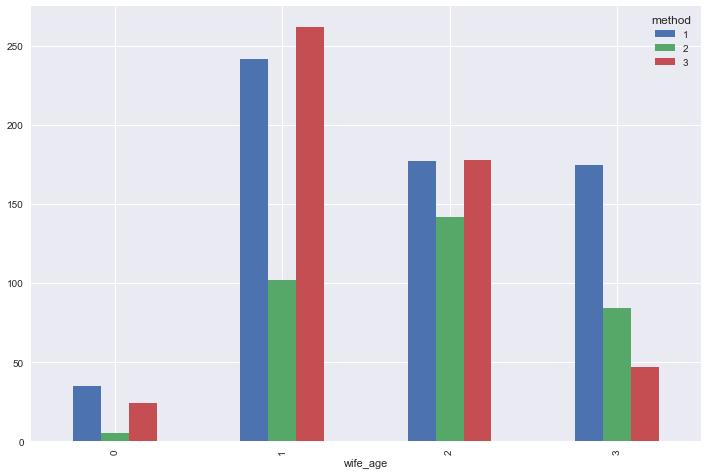

In [52]:
df.pivot_table('children_num', 'wife_age', 'method', 'count').plot(kind='bar')

In [53]:
df.head()

,wife_age,wife_edu,husb_edu,children_num,wife_religion,wife_is_working,husb_occupation,living_index,media_exposure,method
0,1,2,3,3,1,1,2,3,0,1
1,3,1,3,10,1,1,3,4,0,1
2,3,2,3,7,1,1,3,4,0,1
3,3,3,2,9,1,1,3,3,0,1
4,2,3,3,8,1,1,3,2,0,1


In [54]:
df.wife_edu.value_counts()

4    577
3    410
2    334
1    152
Name: wife_edu, dtype: int64

In [55]:
df.husb_edu.value_counts()

4    899
3    352
2    178
1     44
Name: husb_edu, dtype: int64

In [57]:
df.wife_religion.value_counts()

1    1253
0     220
Name: wife_religion, dtype: int64

In [58]:
df[df['wife_religion'] == 0]['method'].value_counts()

2    76
1    75
3    69
Name: method, dtype: int64

In [59]:
df[df['wife_religion'] == 1]['method'].value_counts()

1    554
3    442
2    257
Name: method, dtype: int64

In [61]:
df = df.drop('wife_religion', 1)

In [62]:
df.head()

,wife_age,wife_edu,husb_edu,children_num,wife_is_working,husb_occupation,living_index,media_exposure,method
0,1,2,3,3,1,2,3,0,1
1,3,1,3,10,1,3,4,0,1
2,3,2,3,7,1,3,4,0,1
3,3,3,2,9,1,3,3,0,1
4,2,3,3,8,1,3,2,0,1


In [63]:
df.wife_is_working.value_counts()

1    1104
0     369
Name: wife_is_working, dtype: int64

In [64]:
df[df['wife_is_working'] == 1]['method'].value_counts()

1    459
3    401
2    244
Name: method, dtype: int64

In [66]:
df[df['wife_is_working'] == 0]['method'].value_counts()

1    170
3    110
2     89
Name: method, dtype: int64

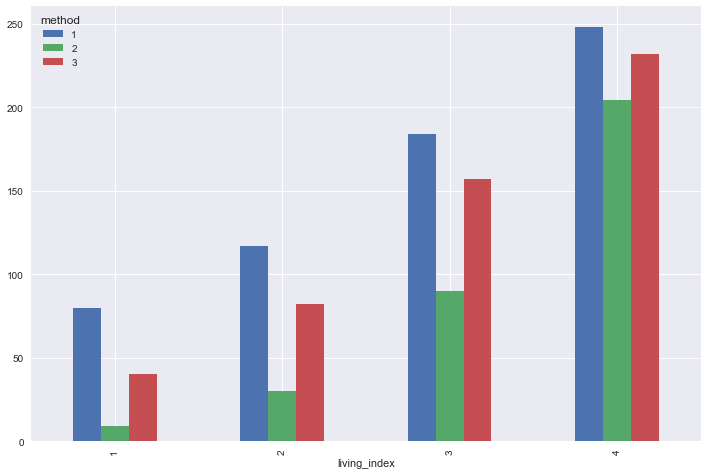

In [67]:
df.pivot_table('children_num', 'living_index', 'method', 'count').plot(kind='bar')

In [71]:
len(df[(df['living_index'] == 1) & (df['method'] == 1)])

80

In [73]:
len(df[(df['living_index'] == 1) & (df['method'] == 1)])/len(df[df['living_index'] == 1])

0.6201550387596899

In [74]:
len(df[(df['living_index'] == 1) & (df['method'] == 2)])/len(df[df['living_index'] == 1])

0.06976744186046512

In [75]:
len(df[(df['living_index'] == 1) & (df['method'] == 3)])/len(df[df['living_index'] == 1])

0.31007751937984496

In [76]:
len(df[(df['living_index'] == 2) & (df['method'] == 1)])/len(df[df['living_index'] == 2])

0.5109170305676856

In [77]:
len(df[(df['living_index'] == 2) & (df['method'] == 2)])/len(df[df['living_index'] == 2])

0.13100436681222707

In [78]:
len(df[(df['living_index'] == 2) & (df['method'] == 3)])/len(df[df['living_index'] == 2])

0.35807860262008734

In [79]:
len(df[(df['living_index'] == 3) & (df['method'] == 1)])/len(df[df['living_index'] == 3])

0.42691415313225056

In [80]:
#percents of peaople that use method one in each class of living
print(len(df[(df['living_index'] == 1) & (df['method'] == 1)])/len(df[df['living_index'] == 1]))
print(len(df[(df['living_index'] == 2) & (df['method'] == 1)])/len(df[df['living_index'] == 2]))
print(len(df[(df['living_index'] == 3) & (df['method'] == 1)])/len(df[df['living_index'] == 3]))
print(len(df[(df['living_index'] == 4) & (df['method'] == 1)])/len(df[df['living_index'] == 4]))



0.6201550387596899
0.5109170305676856
0.42691415313225056
0.36257309941520466


In [81]:
#percents of peaople that use method two in each class of living
print(len(df[(df['living_index'] == 1) & (df['method'] == 2)])/len(df[df['living_index'] == 1]))
print(len(df[(df['living_index'] == 2) & (df['method'] == 2)])/len(df[df['living_index'] == 2]))
print(len(df[(df['living_index'] == 3) & (df['method'] == 2)])/len(df[df['living_index'] == 3]))
print(len(df[(df['living_index'] == 4) & (df['method'] == 2)])/len(df[df['living_index'] == 4]))



0.06976744186046512
0.13100436681222707
0.2088167053364269
0.2982456140350877


In [82]:
#percents of peaople that use method three in each class of living
print(len(df[(df['living_index'] == 1) & (df['method'] == 3)])/len(df[df['living_index'] == 1]))
print(len(df[(df['living_index'] == 2) & (df['method'] == 3)])/len(df[df['living_index'] == 2]))
print(len(df[(df['living_index'] == 3) & (df['method'] == 3)])/len(df[df['living_index'] == 3]))
print(len(df[(df['living_index'] == 4) & (df['method'] == 3)])/len(df[df['living_index'] == 4]))



0.31007751937984496
0.35807860262008734
0.3642691415313225
0.3391812865497076


In [83]:
df.head()

,wife_age,wife_edu,husb_edu,children_num,wife_is_working,husb_occupation,living_index,media_exposure,method
0,1,2,3,3,1,2,3,0,1
1,3,1,3,10,1,3,4,0,1
2,3,2,3,7,1,3,4,0,1
3,3,3,2,9,1,3,3,0,1
4,2,3,3,8,1,3,2,0,1


In [84]:
df.media_exposure.value_counts()

0    1364
1     109
Name: media_exposure, dtype: int64

In [85]:
print(df[df['media_exposure'] == 1]['method'].value_counts())
print(df[df['media_exposure'] == 0]['method'].value_counts())

1    74
3    25
2    10
Name: method, dtype: int64
1    555
3    486
2    323
Name: method, dtype: int64


In [92]:
df = pd.concat([df, pd.get_dummies(df['children_num'], prefix='children')], axis=1)


In [93]:
df.head()

,wife_age,wife_edu,husb_edu,children_num,wife_is_working,husb_occupation,living_index,media_exposure,method,children_0,...,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_16
0,1,2,3,3,1,2,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,3,10,1,3,4,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,3,7,1,3,4,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,2,9,1,3,3,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,8,1,3,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
df = df.drop('children_num', 1)

In [95]:
df.head()

,wife_age,wife_edu,husb_edu,wife_is_working,husb_occupation,living_index,media_exposure,method,children_0,children_1,...,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_16
0,1,2,3,1,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,3,1,3,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,3,1,3,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,2,1,3,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,1,3,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
df.loc[:, df.columns != 'method'].head()

,wife_age,wife_edu,husb_edu,wife_is_working,husb_occupation,living_index,media_exposure,children_0,children_1,children_2,...,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_16
0,1,2,3,1,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,3,1,3,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,3,1,3,4,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,2,1,3,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,1,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'method'], 
                                                    df['method'], test_size=0.33 , random_state=42)

In [99]:
len(X_train)

986

In [100]:
len(X_test)

487

In [101]:
Y_train.head()

617     2
558     2
490     2
1344    3
308     1
Name: method, dtype: int64

In [103]:
params_lr = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
params_kn = {'n_neighbors': [x for x in range(2,50,4)], 'p': [x for x in range(1,5)] }
params_rf = {'n_estimators': [x for x in range(10,200,10)]}


LR_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params_lr, n_jobs=-1, cv=5)
LR_grid.fit(X_train, Y_train)
print(LR_grid.best_estimator_)
predicted_by_LR = LR_grid.best_estimator_.predict(X_test)
accuracy_by_best_LR = accuracy_score(Y_test, predicted_by_LR)
print('LinReg', accuracy_by_best_LR)
    
KN_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_kn, n_jobs=-1, cv=5)
KN_grid.fit(X_train, Y_train)
print('\n',KN_grid.best_estimator_)
predicted_by_KN = KN_grid.best_estimator_.predict(X_test)
accuracy_by_best_KN = accuracy_score(Y_test, predicted_by_KN)
print('\n', 'Kneighbors', accuracy_by_best_KN)

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, n_jobs=-1, cv=5)
RF_grid.fit(X_train, Y_train)
print('\n',RF_grid.best_estimator_)
predicted_by_RF = RF_grid.best_estimator_.predict(X_test)
accuracy_by_best_RF = accuracy_score(Y_test, predicted_by_RF)
print('\n', 'RandomForest', accuracy_by_best_RF)



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinReg 0.542094455852

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=1,
           weights='uniform')

 Kneighbors 0.544147843943

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=180, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

 RandomForest 0.544147843943


In [104]:
print('\RandForest: \n', classification_report(Y_test, predicted_by_RF))

\RandForest: 
              precision    recall  f1-score   support

          1       0.63      0.64      0.63       206
          2       0.46      0.33      0.38       120
          3       0.49      0.58      0.53       161

avg / total       0.54      0.54      0.54       487



In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
print('\RandForest: \n', confusion_matrix(Y_test, predicted_by_RF))

\RandForest: 
 [[132  21  53]
 [ 36  39  45]
 [ 43  24  94]]


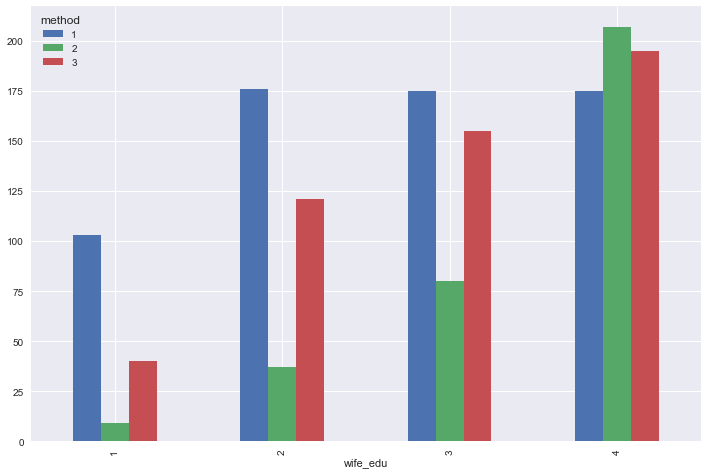

In [109]:
df.pivot_table('wife_is_working', 'wife_edu', 'method', 'count').plot(kind='bar')

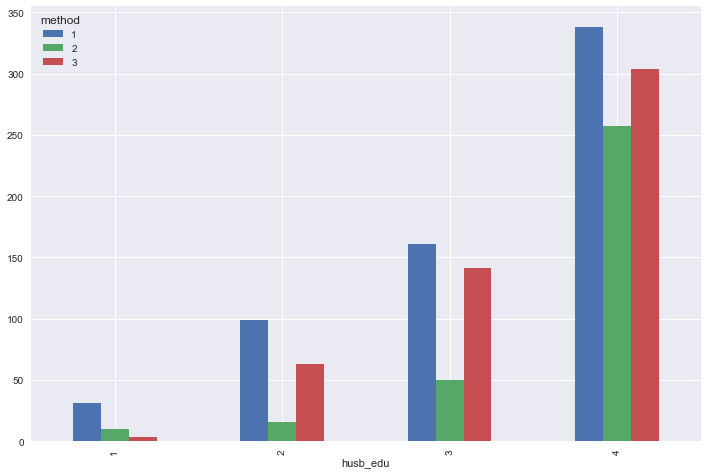

In [110]:
df.pivot_table('wife_is_working', 'husb_edu', 'method', 'count').plot(kind='bar')

In [108]:
df.head()


,wife_age,wife_edu,husb_edu,wife_is_working,husb_occupation,living_index,media_exposure,method,children_0,children_1,...,children_5,children_6,children_7,children_8,children_9,children_10,children_11,children_12,children_13,children_16
0,1,2,3,1,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,3,1,3,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,3,1,3,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,2,1,3,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,1,3,2,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [111]:
df['wife_edu'] = df['wife_edu'].map(lambda x: 0 if x < 4 else 1)

In [112]:
df['husb_edu'] = df['husb_edu'].map(lambda x: 0 if x < 4 else 1)

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'method'], 
                                                    df['method'], test_size=0.33 , random_state=42)

In [114]:
params_lr = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
params_kn = {'n_neighbors': [x for x in range(2,50,4)], 'p': [x for x in range(1,5)] }
params_rf = {'n_estimators': [x for x in range(10,200,10)]}


LR_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params_lr, n_jobs=-1, cv=5)
LR_grid.fit(X_train, Y_train)
print(LR_grid.best_estimator_)
predicted_by_LR = LR_grid.best_estimator_.predict(X_test)
accuracy_by_best_LR = accuracy_score(Y_test, predicted_by_LR)
print('LinReg', accuracy_by_best_LR)
    
KN_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_kn, n_jobs=-1, cv=5)
KN_grid.fit(X_train, Y_train)
print('\n',KN_grid.best_estimator_)
predicted_by_KN = KN_grid.best_estimator_.predict(X_test)
accuracy_by_best_KN = accuracy_score(Y_test, predicted_by_KN)
print('\n', 'Kneighbors', accuracy_by_best_KN)

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, n_jobs=-1, cv=5)
RF_grid.fit(X_train, Y_train)
print('\n',RF_grid.best_estimator_)
predicted_by_RF = RF_grid.best_estimator_.predict(X_test)
accuracy_by_best_RF = accuracy_score(Y_test, predicted_by_RF)
print('\n', 'RandomForest', accuracy_by_best_RF)



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinReg 0.554414784394

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=38, p=3,
           weights='uniform')

 Kneighbors 0.52977412731

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=170, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

 RandomForest 0.525667351129


In [115]:
print('\RandForest: \n', confusion_matrix(Y_test, predicted_by_LR))

\RandForest: 
 [[143  12  51]
 [ 31  32  57]
 [ 50  16  95]]


In [116]:
print('\RandForest: \n', confusion_matrix(Y_test, predicted_by_RF))

\RandForest: 
 [[128  18  60]
 [ 37  34  49]
 [ 42  25  94]]
